        data   valor
0 2024-01-02  4.8916
1 2024-01-03  4.9212
2 2024-01-04  4.9188
3 2024-01-05  4.8899
4 2024-01-08  4.8850


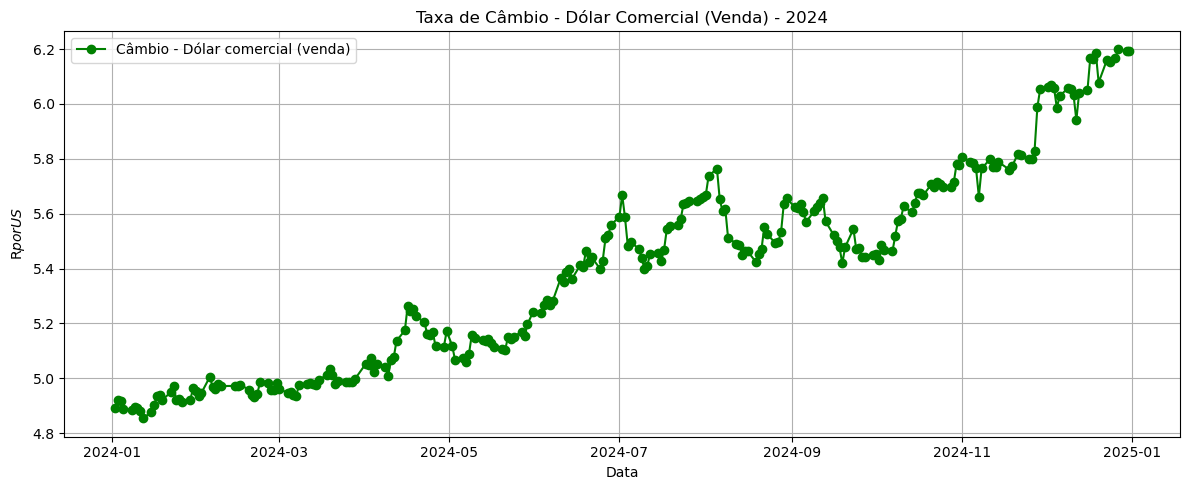

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Requisição de dados da API do Banco Central
# -----------------------------

# URL da API para a taxa de câmbio - Dólar comercial venda (código 1)
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1/dados"

# Parâmetros da consulta
params = {
    "formato": "json",
    "dataInicial": "01/01/2024",
    "dataFinal": "31/12/2024"
}

# Requisição GET
response = requests.get(url, params=params)

# Verifica se a resposta foi bem-sucedida
if response.status_code != 200:
    raise Exception(f"Erro ao acessar a API: {response.status_code}")

# Converte para JSON
dados = response.json()

# -----------------------------
# 2. Conversão para DataFrame
# -----------------------------
df = pd.DataFrame(dados)
df['data'] = pd.to_datetime(df['data'], dayfirst=True)
df['valor'] = df['valor'].astype(float)

# Exibir os primeiros dados
print(df.head())

# -----------------------------
# 3. Geração do gráfico
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(df['data'], df['valor'], label='Câmbio - Dólar comercial (venda)', color='green', marker='o')
plt.title('Taxa de Câmbio - Dólar Comercial (Venda) - 2024')
plt.xlabel('Data')
plt.ylabel('R$ por US$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Exportar para CSV (opcional)
# -----------------------------
#df.to_csv("cambio_dolar_2024.csv", index=False)
